In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [6]:
small_cap_monthly = pd.read_csv("small_cap_mf_monthly.csv", low_memory=False)
small_cap_monthly["caldt"] = pd.to_datetime(small_cap_monthly["caldt"])
small_cap_monthly["mret"] = small_cap_monthly["mret"].str.replace('R',"0.0")
small_cap_monthly["mret"] = small_cap_monthly["mret"].astype("float")

print(small_cap_monthly.shape)
small_cap_monthly.head()

(224634, 5)


,crsp_fundno,caldt,mtna,mret,mnav
0,2727,2010-01-29,341.8,-0.037819,10.94
1,2727,2010-02-26,357.1,0.044790,11.43
2,2727,2010-03-31,383.5,0.072616,12.26
3,2727,2010-04-30,401.7,0.039152,12.74
4,2727,2010-05-28,365.5,-0.064364,11.92


0.1 71477.7


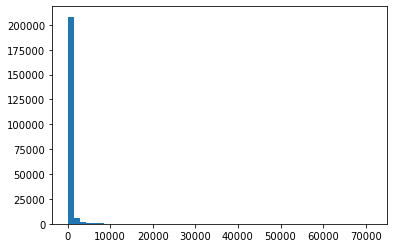

In [8]:
print(small_cap_monthly["mtna"].min(),small_cap_monthly["mtna"].max())
plt.hist(list(small_cap_monthly["mtna"]),50);


In [25]:
bins = [0, 10000, 20000, np.inf]
small_cap_monthly['size'] = pd.cut(small_cap_monthly['mtna'], bins, labels=["Small","Mid","Large"])
small_cap_monthly

,crsp_fundno,caldt,mtna,mret,mnav,size,time_elapsed
0,2727,2010-01-29,341.8,-0.037819,10.94,Small,0
1,2727,2010-02-26,357.1,0.044790,11.43,Small,1
2,2727,2010-03-31,383.5,0.072616,12.26,Small,2
3,2727,2010-04-30,401.7,0.039152,12.74,Small,3
4,2727,2010-05-28,365.5,-0.064364,11.92,Small,4
...,...,...,...,...,...,...,...
224629,97865,2021-02-26,272.9,0.070423,32.68,Small,133
224630,97865,2021-03-31,293.6,0.050796,34.34,Small,134
224631,97865,2021-04-30,298.3,0.016890,34.92,Small,135
224632,97865,2021-05-28,301.9,0.017182,35.52,Small,136


In [26]:
def diff_month(d1):
    return (d1.year - 2010) * 12 + d1.month - 1

small_cap_monthly["time_elapsed"] = small_cap_monthly["caldt"].apply(lambda x: diff_month(x))
small_cap_monthly.head()

,crsp_fundno,caldt,mtna,mret,mnav,size,time_elapsed
0,2727,2010-01-29,341.8,-0.037819,10.94,Small,0
1,2727,2010-02-26,357.1,0.044790,11.43,Small,1
2,2727,2010-03-31,383.5,0.072616,12.26,Small,2
3,2727,2010-04-30,401.7,0.039152,12.74,Small,3
4,2727,2010-05-28,365.5,-0.064364,11.92,Small,4


<AxesSubplot:xlabel='size'>

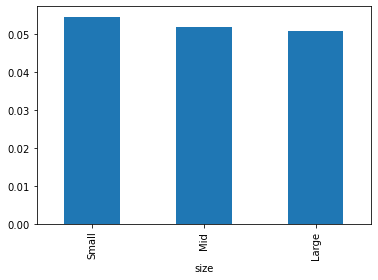

In [27]:
small_cap_monthly.groupby("size")["mret"].agg("std").plot(kind = "bar")

# plt.bar(height= small_cap_monthly.groupby("size")["mret"].agg("std"), x= ["Small","Mid","Large"])

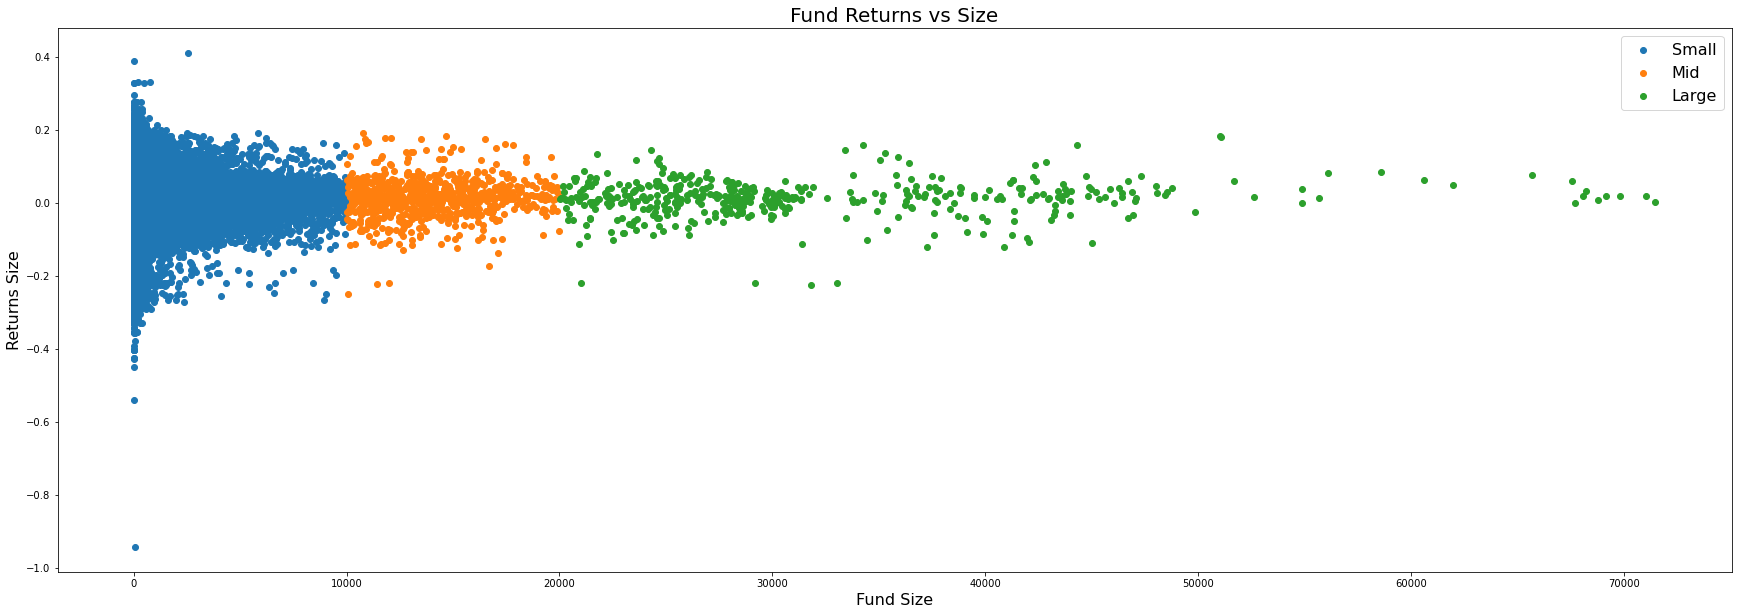

In [30]:
plt.figure().set_size_inches(30, 10,  forward=True)
for size in ["Small","Mid","Large"]:
    tmpdf = small_cap_monthly[(small_cap_monthly["size"] == size)]
    plt.scatter(y = tmpdf["mret"],x = tmpdf["mtna"], label = size)
plt.legend(fontsize = 16)
plt.xlabel("Fund Size",fontsize = 16)
plt.ylabel("Returns Size",fontsize = 16)
plt.title("Fund Returns vs Size", fontsize = 20)
plt.show()

<AxesSubplot:xlabel='time_elapsed'>

<Figure size 2160x720 with 0 Axes>

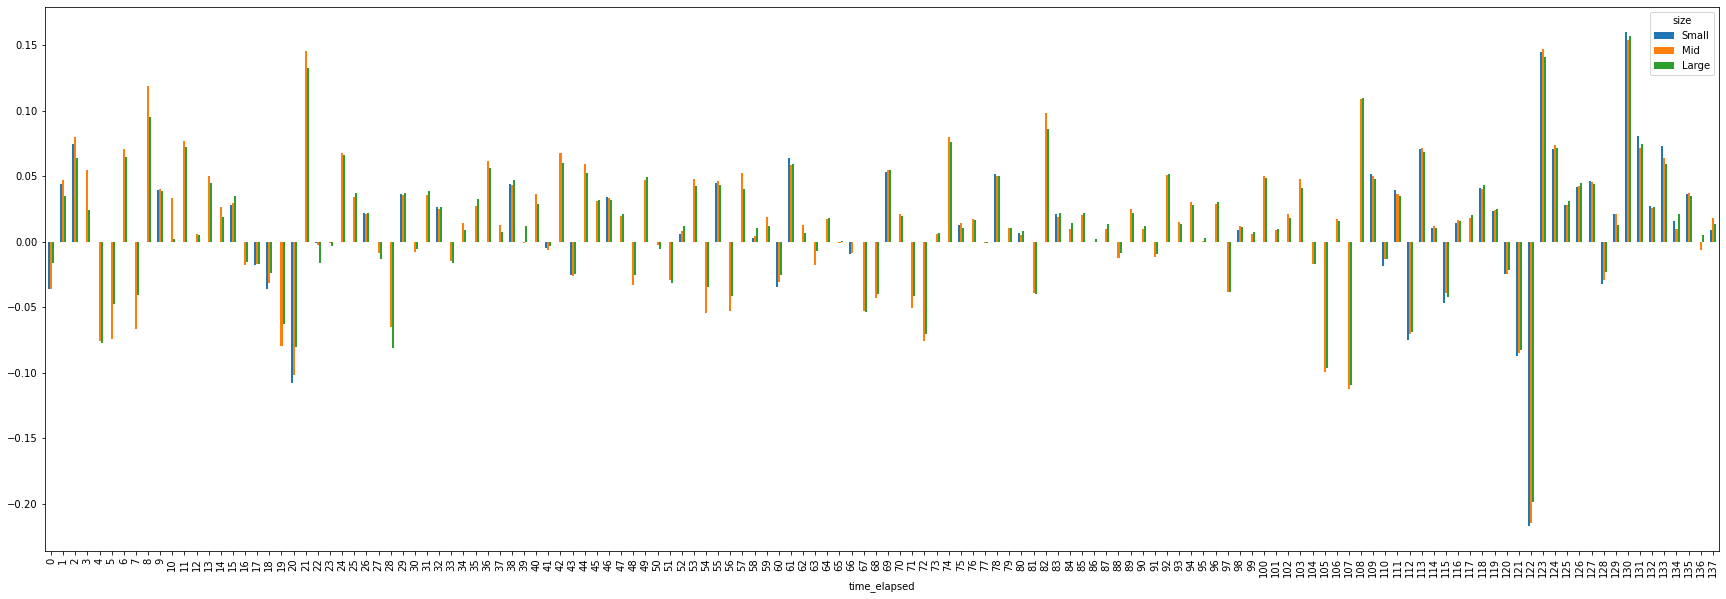

In [24]:
from scipy.stats.mstats import gmean

def get_gmean(series):
    return gmean(series+1)-1
    
plt.figure().set_size_inches(30, 10,  forward=True)
t = small_cap_monthly.groupby(["time_elapsed","size"])["mret"].agg(get_gmean).unstack().plot(kind = "bar")
t.figure.set_size_inches(30, 10,  forward=True)
# plt.plot(t.index, (t["Small"]), label = "Small sized Small Cap")
# plt.plot(t.index, t["Mid"], label = "Medium sized Small Cap")
# plt.plot(t.index, t["Large"], label = "Larged sized Small Cap")
# plt.legend()
t

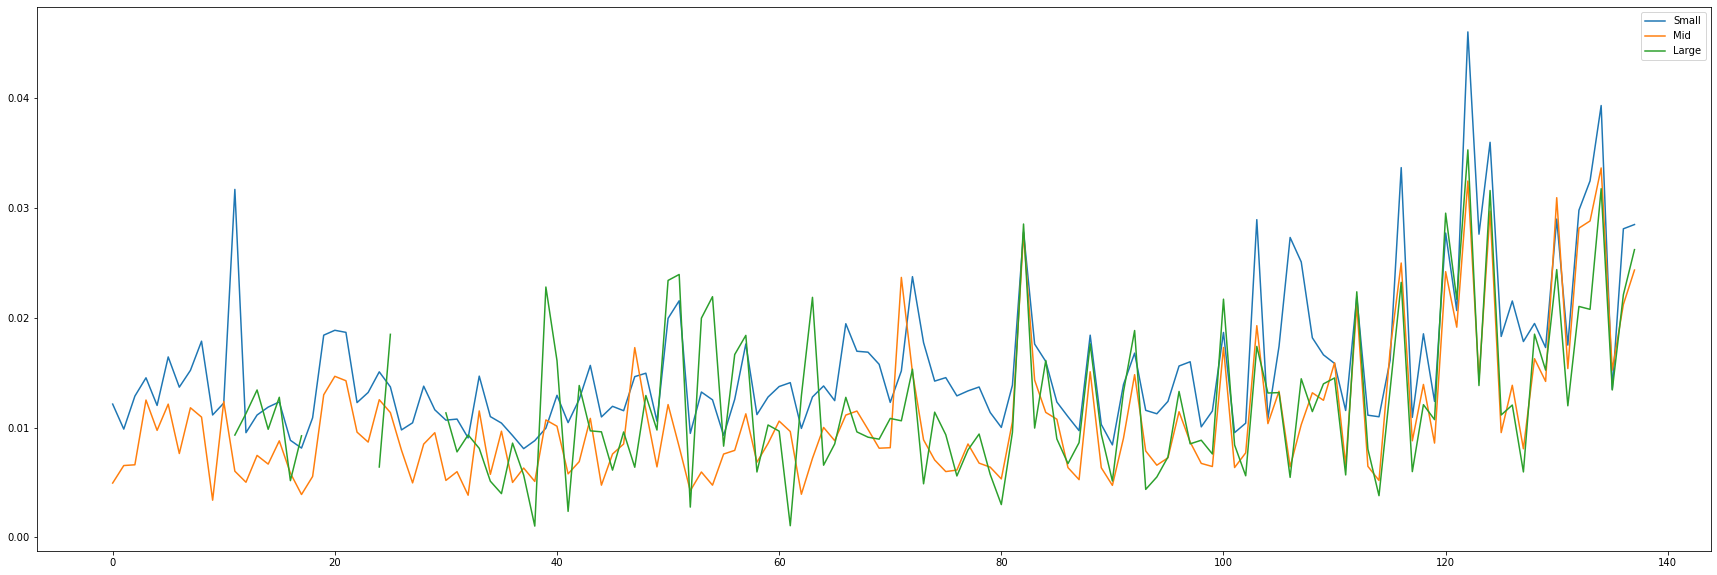

In [15]:
plt.figure().set_size_inches(30, 10,  forward=True)
t = small_cap_monthly.groupby(["time_elapsed","size"])["mret"].agg("std").unstack()
plt.plot(t)
plt.legend(t.columns)

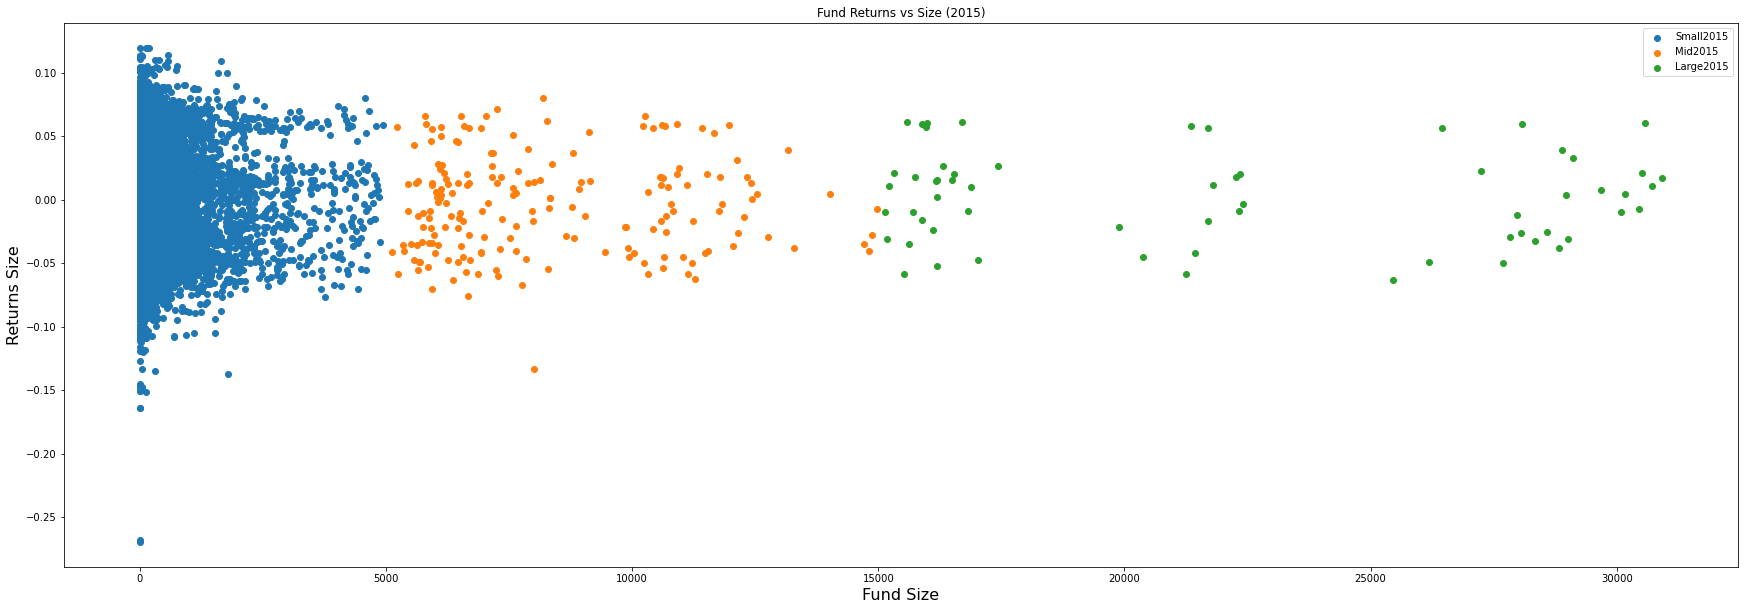

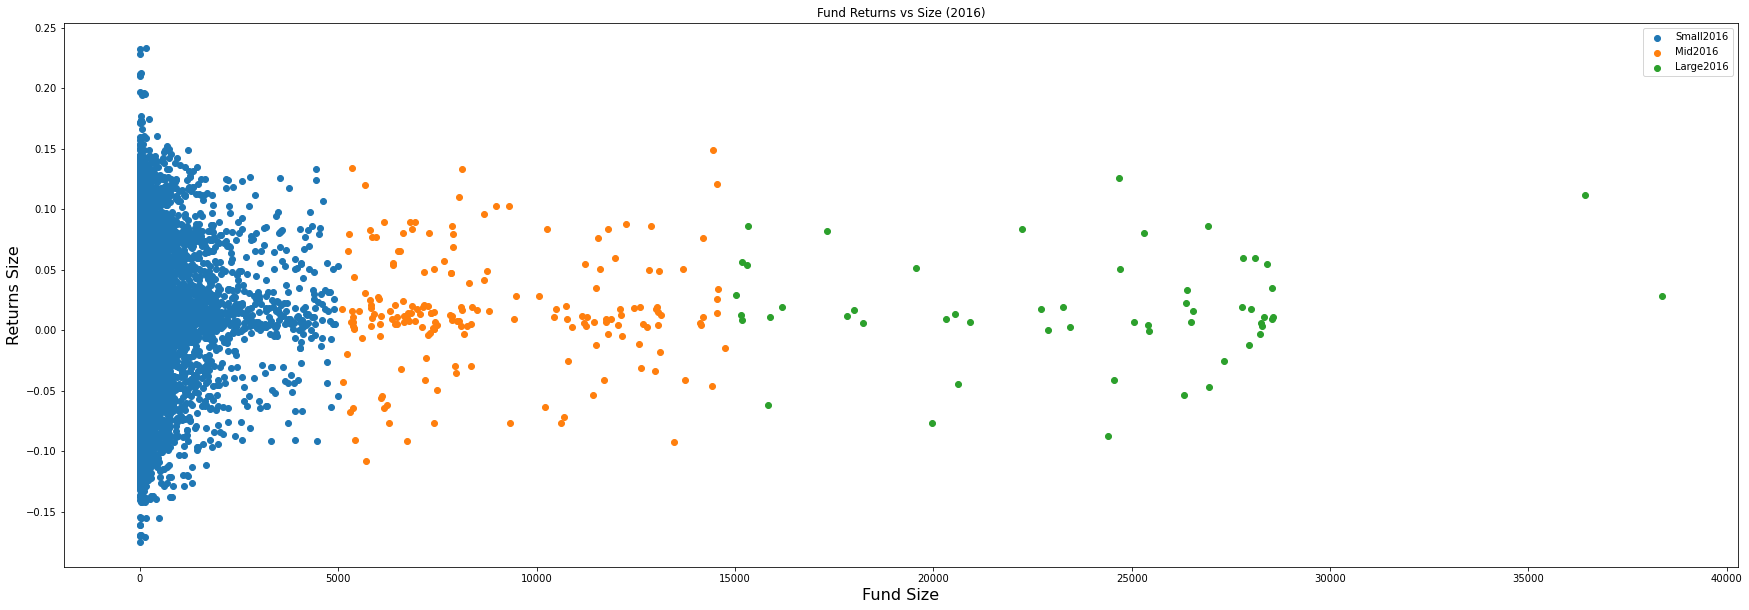

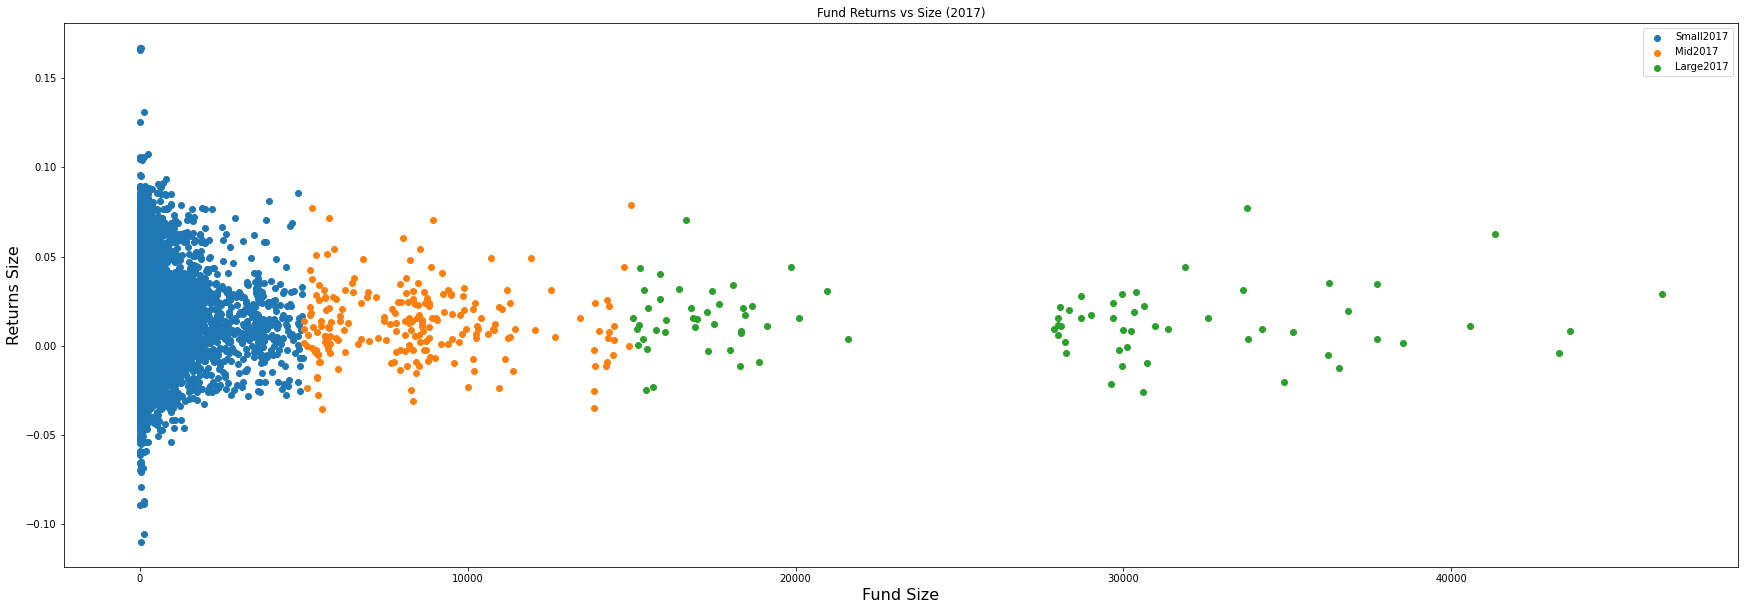

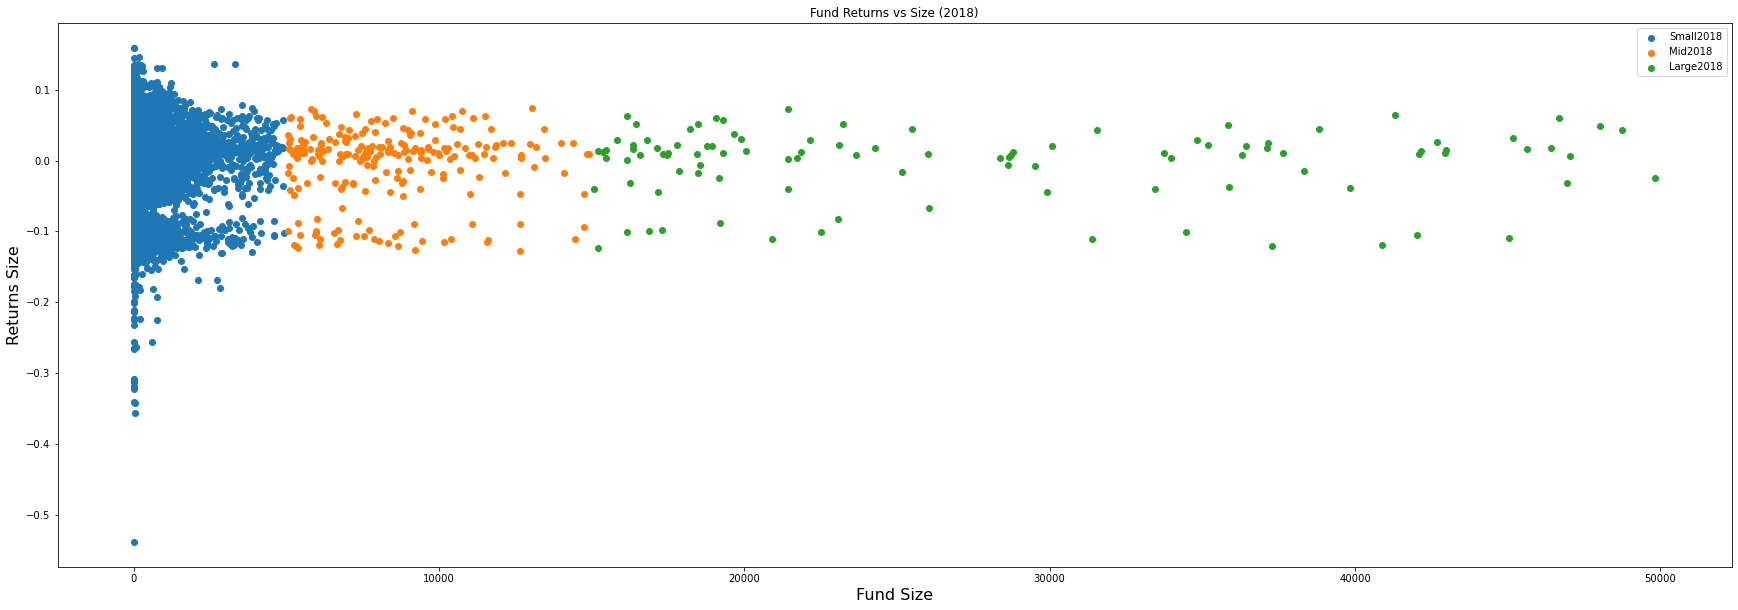

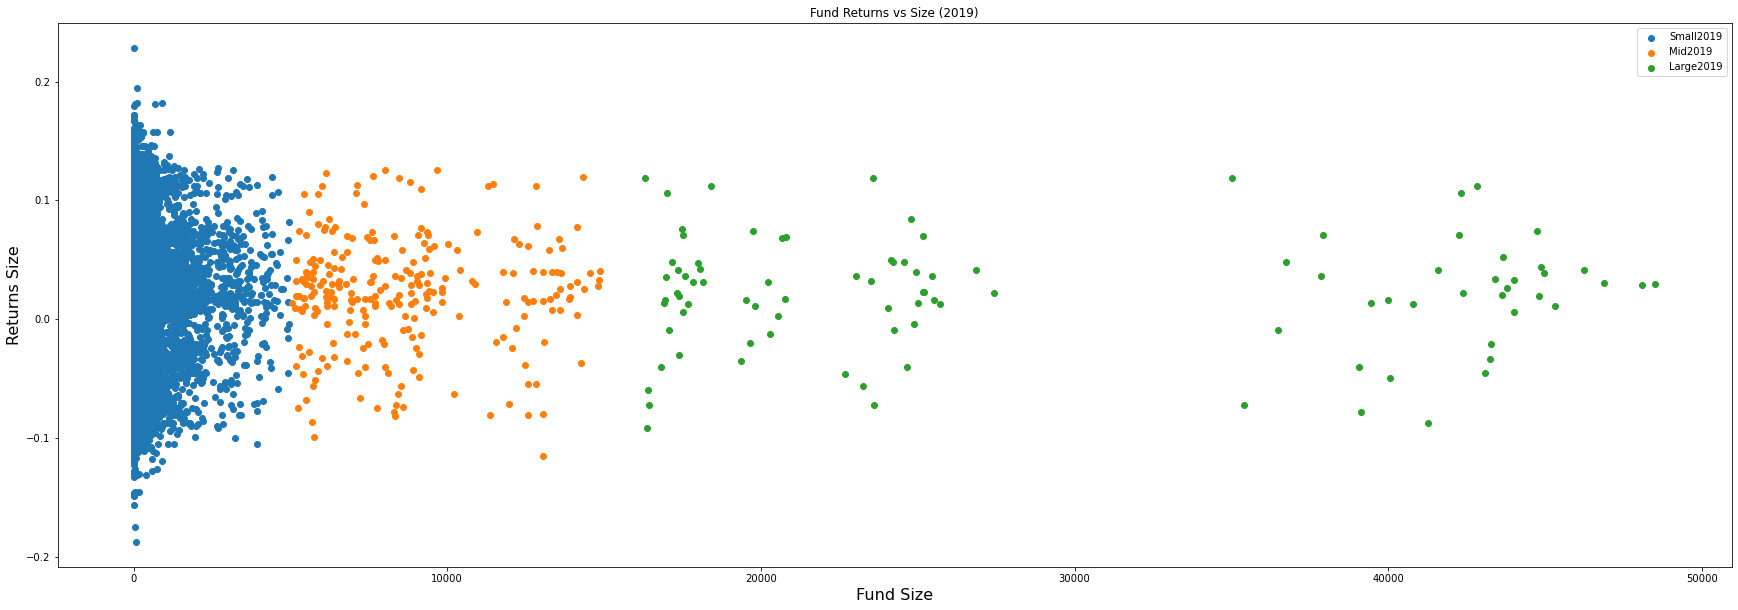

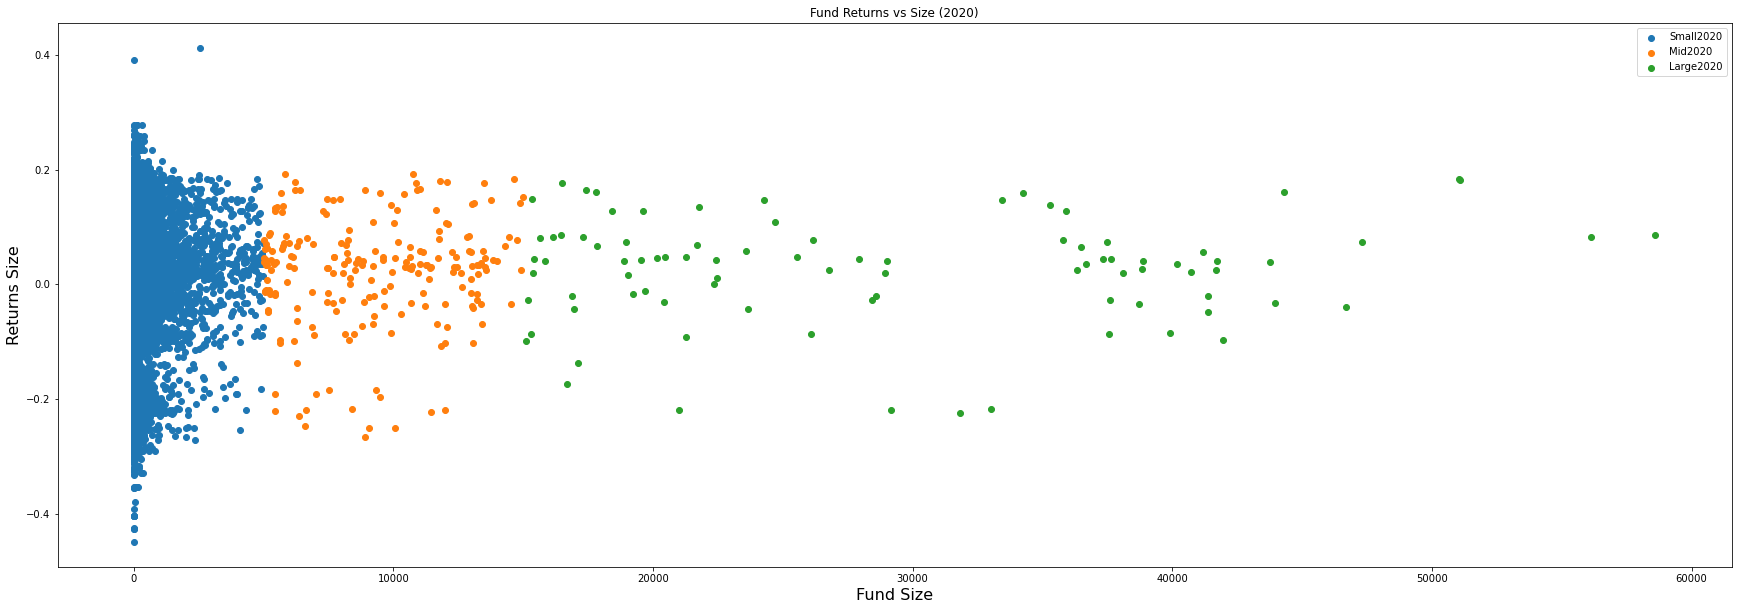

In [16]:
for year in range(2015,2021):
    plt.figure().set_size_inches(30, 10,  forward=True)
    for size in ["Small","Mid","Large"]:
        tmpdf = small_cap_monthly[(small_cap_monthly["size"] == size)&(small_cap_monthly.caldt.dt.year == year)]
        plt.scatter(y = tmpdf["mret"],x = tmpdf["mtna"], label = size+str(year))
    plt.legend()
    plt.xlabel("Fund Size",fontsize = 16)
    plt.ylabel("Returns Size",fontsize = 16)
    plt.title("Fund Returns vs Size ("+str(year)+")")
    plt.show()

In [4]:
for size in ["Small","Mid","Large"]:
    tmpdf = small_cap_monthly[(small_cap_monthly["size"] == size)]
    plt.scatter(y = tmpdf["mret"],x = tmpdf["mtna"], label = size+str(year))
plt.legend()
plt.xlabel("Fund Size",fontsize = 16)
plt.ylabel("Returns Size",fontsize = 16)
plt.title("Fund Returns vs Size ("+str(year)+")")
plt.show()

NameError: name 'small_cap_monthly' is not defined

In [26]:
small_cap_monthly = small_cap_monthly.set_index("caldt")

TypeError: 'value' must be an instance of str or bytes, not a float

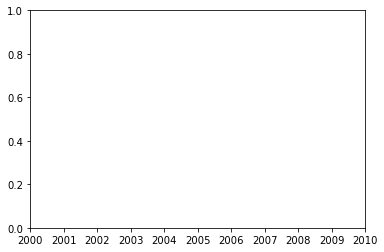

In [30]:
t = small_cap_monthly[small_cap_monthly["size"] == "Small"].mret
plt.plot(t)

In [24]:
small_cap_monthly.sort_values(by="caldt")

,crsp_fundno,caldt,mtna,mret,mnav,size
0,2727,2010-01-29,341.8,-0.037819,10.9400,Small
117652,36867,2010-01-29,0.1,-0.041969,23.7400,Small
117521,36845,2010-01-29,NaN,-0.033780,8.1635,NaN
9795,4762,2010-01-29,1182.8,-0.023990,15.4600,Small
117390,36844,2010-01-29,NaN,-0.024521,8.0080,NaN
...,...,...,...,...,...,...
202277,61587,2021-06-30,19.1,-0.013304,17.8000,Small
102218,29707,2021-06-30,140.8,-0.021127,20.8500,Small
12574,6154,2021-06-30,12.9,0.039933,6.2500,Small
101528,29619,2021-06-30,473.2,0.015214,22.0200,Small


In [ ]:
bins = [0, 50, 150, np.inf]
small_cap_monthly["m"] = pd.cut(small_cap_monthly['nav_latest'], bins, labels=["Small","Mid","Large"])
small_cap_monthly